In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize']=[15,8]

In [3]:
train=pd.read_csv('C:/Users/welcome/Excel Documents/Participants_Data_HPW_1/train.csv')

In [4]:
test=pd.read_csv('C:/Users/welcome/Excel Documents/Participants_Data_HPW_1/test.csv')

In [5]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,52,Private,98926,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,-3,0,44,United-States,<=50K
1,76,Self-emp-not-inc,132607,Bachelors,12,Married-civ-spouse,Sales,Husband,White,Male,7527,0,44,United-States,>50K
2,40,Private,243258,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,19,0,57,United-States,>50K
3,76,State-gov,181259,Bachelors,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,7720,0,44,United-States,>50K
4,36,Self-emp-inc,115379,Masters,13,Divorced,Exec-managerial,Not-in-family,White,Male,12,0,58,United-States,<=50K


In [6]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,income,hours-per-week
0,40,Without-pay,106899,HS-grad,8,Never-married,Adm-clerical,Own-child,White,Male,0,0,United-States,<=50K,NaN
1,38,Private,157191,HS-grad,8,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,United-States,<=50K,NaN
2,76,Self-emp-not-inc,102547,Some-college,10,Widowed,Sales,Not-in-family,Asian-Pac-Islander,Female,32,0,United-States,<=50K,NaN
3,38,Self-emp-not-inc,44426,HS-grad,9,Never-married,Sales,Unmarried,White,Male,30,0,United-States,>50K,NaN
4,62,Without-pay,33230,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,-4,0,United-States,<=50K,NaN


In [7]:
num=[]
cat=[]
for i in train.columns:
    if train[i].dtypes==object:
        cat.append(i)
    else:
        num.append(i)
print(num,cat,sep='\n')

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [8]:
num=[]
cat=[]
for i in test.columns:
    if test[i].dtypes==object:
        cat.append(i)
    else:
        num.append(i)
print(num,cat,sep='\n')

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [9]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [10]:
test.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
native-country       0
income               0
hours-per-week    8119
dtype: int64

In [11]:
train[['education-num','capital-gain','capital-loss']]=train[['education-num','capital-gain','capital-loss']].astype(object)
test[['education-num','capital-gain','capital-loss']]=test[['education-num','capital-gain','capital-loss']].astype(object)

In [12]:
num_data_train=train.select_dtypes(include=np.number)
num_data_test=test.select_dtypes(include=np.number)
cat_data_train=train.select_dtypes(include=np.object)
cat_data_test=test.select_dtypes(include=np.object)

In [13]:
for i in num_data_train.columns:
    q3=num_data_train[i].quantile(0.75)
    q1=num_data_train[i].quantile(0.25)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    uc=num_data_train[i].quantile(0.99)
    lc=num_data_train[i].quantile(0.01)
    for val in num_data_train[i].index:
        if num_data_train.loc[val,i]>ub:
            num_data_train.loc[val,i]=uc
        if num_data_train.loc[val,i]<lb:
            num_data_train.loc[val,i]=lc

In [14]:
for i in num_data_test.columns:
    q3=num_data_test[i].quantile(0.75)
    q1=num_data_test[i].quantile(0.25)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    uc=num_data_test[i].quantile(0.99)
    lc=num_data_test[i].quantile(0.01)
    for val in num_data_test[i].index:
        if num_data_test.loc[val,i]>ub:
            num_data_test.loc[val,i]=uc
        if num_data_test.loc[val,i]<lb:
            num_data_test.loc[val,i]=lc

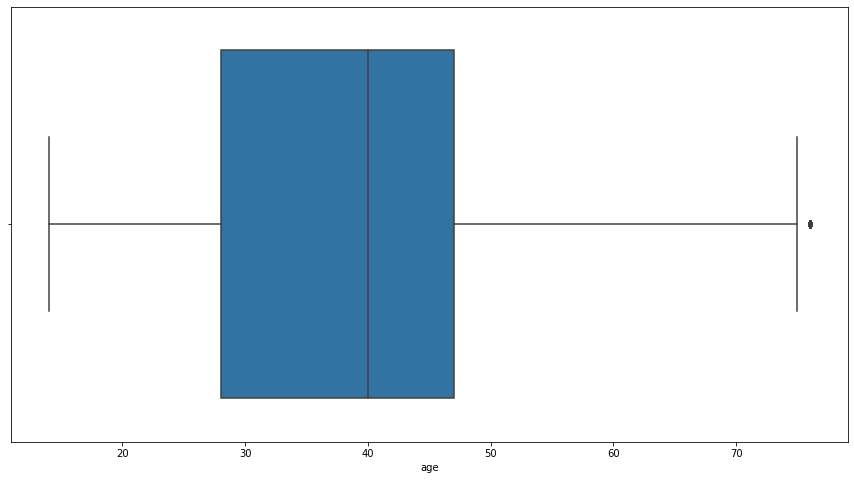

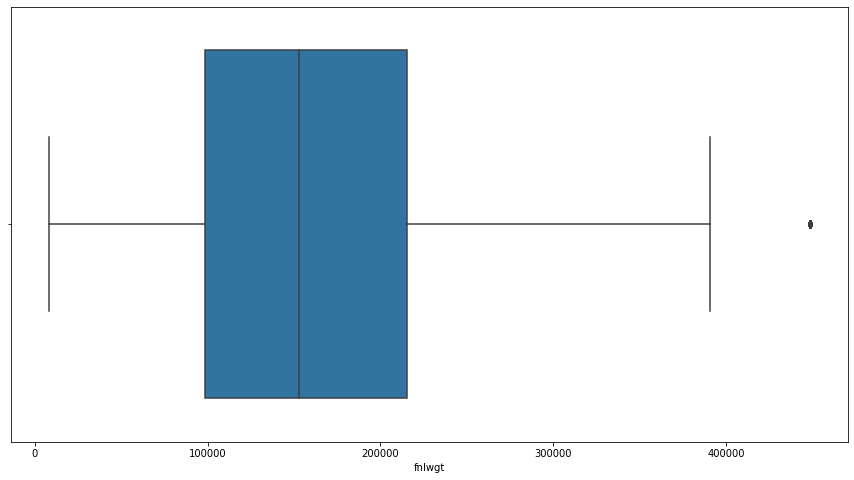

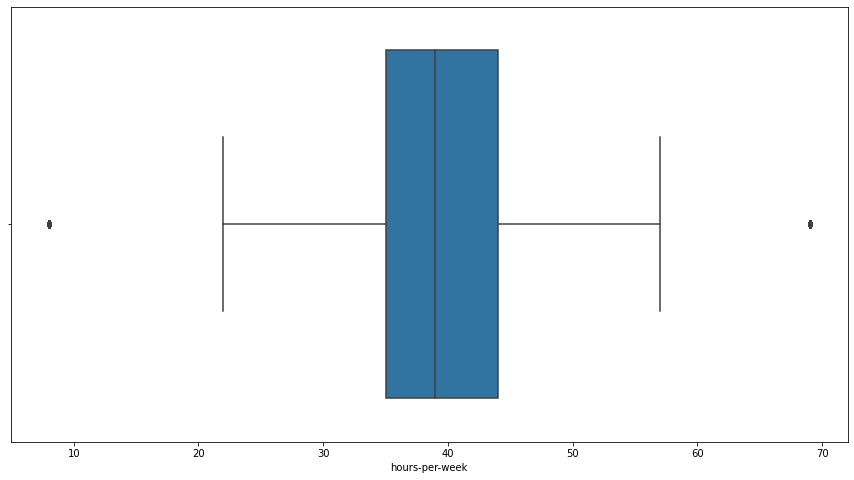

In [15]:
for i in num_data_train.columns:
    sns.boxplot(num_data_train[i])
    plt.show()

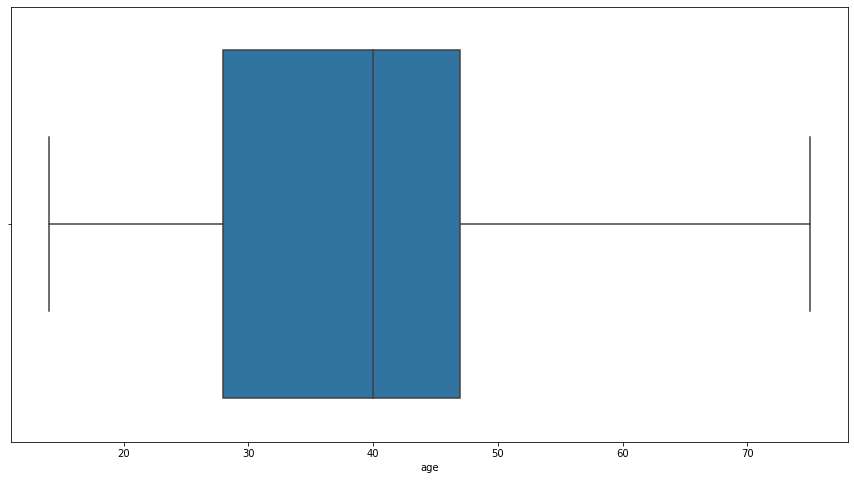

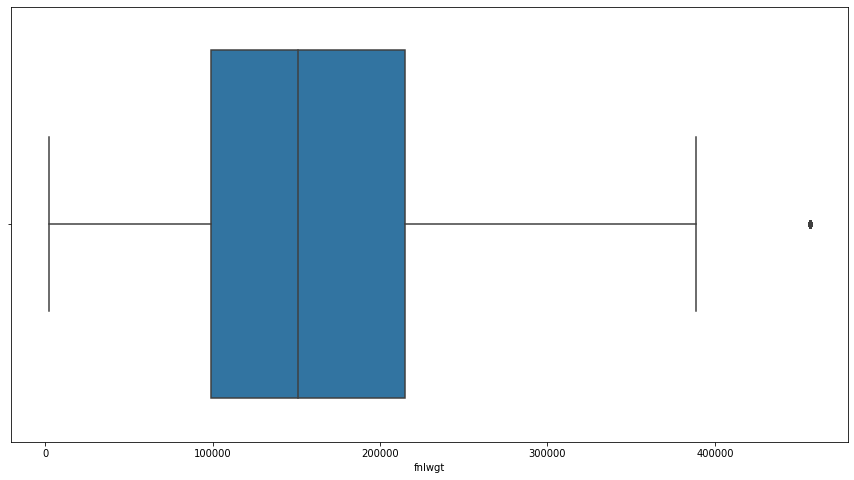

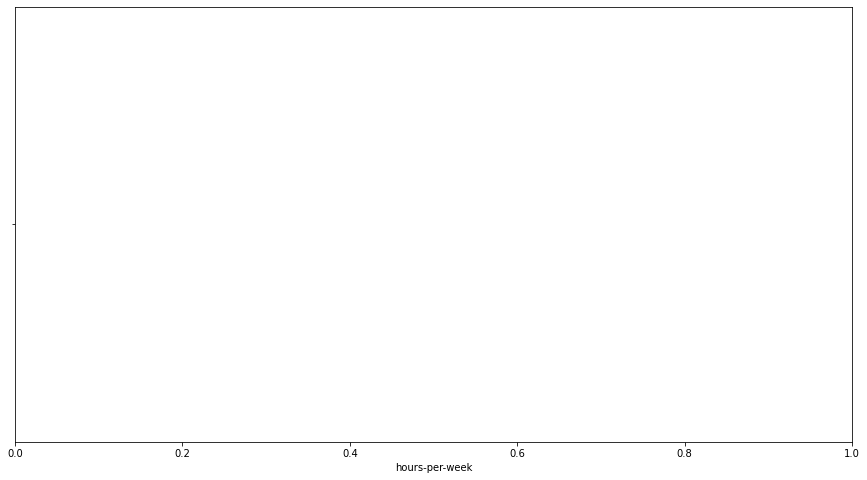

In [16]:
for i in num_data_test.columns:
    sns.boxplot(num_data_test[i])
    plt.show()

In [17]:
test['hours-per-week']=test['hours-per-week'].fillna(train['hours-per-week'].mean())

In [18]:
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
native-country    0
income            0
hours-per-week    0
dtype: int64

In [19]:
print(num_data_train.columns,cat_data_train.columns,num_data_test.columns,cat_data_test.columns,sep='\n')

Index(['age', 'fnlwgt', 'hours-per-week'], dtype='object')
Index(['workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'native-country', 'income'],
      dtype='object')
Index(['age', 'fnlwgt', 'hours-per-week'], dtype='object')
Index(['workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'native-country', 'income'],
      dtype='object')


In [20]:
train_drop=train.drop(columns='hours-per-week')
test_drop=test.drop(columns='hours-per-week')

In [21]:
train_target=train['hours-per-week']
test_target=test['hours-per-week']

In [22]:
test_target=test_target.fillna(test_target.mean())

In [23]:
num_data_train=train_drop.select_dtypes(include=np.number)
num_data_test=test_drop.select_dtypes(include=np.number)
cat_data_train=train_drop.select_dtypes(include=np.object)
cat_data_test=test_drop.select_dtypes(include=np.object)

In [24]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

In [25]:
sc=StandardScaler()
oe=OrdinalEncoder()

In [26]:
num_dataframe_train=pd.DataFrame(sc.fit_transform(num_data_train),columns=num_data_train.columns)
num_dataframe_test=pd.DataFrame(sc.fit_transform(num_data_test),columns=num_data_test.columns)

In [27]:
cat_dataframe_train=pd.DataFrame(oe.fit_transform(cat_data_train),columns=cat_data_train.columns)
cat_dataframe_test=pd.DataFrame(oe.fit_transform(cat_data_test),columns=cat_data_test.columns)

In [28]:
concat_data_train=pd.concat([num_dataframe_train,cat_dataframe_train],axis=1)
concat_data_test=pd.concat([num_dataframe_test,cat_dataframe_test],axis=1)

In [29]:
x_train,x_test=concat_data_train.copy(),concat_data_test.copy()
y_train,y_test=train_target.copy(),test_target.copy()

In [30]:
import statsmodels
import statsmodels.api

In [31]:
mlr_model=statsmodels.api.OLS(y_train,x_train).fit()

In [32]:
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         hours-per-week   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                          1.778e+04
Date:                Mon, 20 Sep 2021   Prob (F-statistic):                        0.00
Time:                        19:50:51   Log-Likelihood:                         -72424.
No. Observations:               18944   AIC:                                  1.449e+05
Df Residuals:                   18930   BIC:                                  1.450e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
age                1.2272      0.086     14.211      0.000       1.058       1.396
fnlwgt            -0.1898      0.082     -2.327      0.020      -0.350      -0.030
workclass          1.4414      0.056     25.691      0.000       1.331       1.551
education          0.2512      0.021     12.028      0.000       0.210       0.292
education-num      1.1363      0.031     36.963      0.000       1.076       1.197
marital-status     0.6578      0.053     12.495      0.000       0.555       0.761
occupation         0.2444      0.019     12.724      0.000       0.207       0.282
relationship       0.2018      0.054      3.741      0.000       0.096       0.307
race               1.6154      0.067     24.045      0.000       1.484       1.747
sex                6.6060      0.191     34.543      0.000       6.231       6.981
capital-gain       0.0023      0.000      5.221      0.000       0.001       0.003
capital-loss       0.0121      0.006      2.141      0.032       0.001       0.023
native-country     0.3009      0.009     34.268      0.000       0.284       0.318
income             1.7509      0.206      8.515      0.000       1.348       2.154
==============================================================================
Omnibus:                      694.909   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2107.694
Skew:                           0.004   Prob(JB):                         0.00
Kurtosis:                       4.634   Cond. No.                         558.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
from scipy import stats as stats

In [34]:
stats.shapiro(mlr_model.resid)

ShapiroResult(statistic=0.9827155470848083, pvalue=2.3317606446364956e-42)

In [35]:
stats.jarque_bera(mlr_model.resid)

Jarque_beraResult(statistic=2107.6940486580306, pvalue=0.0)

In [36]:
from statsmodels.stats.stattools import durbin_watson

In [37]:
durbin_watson(mlr_model.resid)

2.0008782471968583

In [38]:
mlr_model.rsquared_adj

0.9292679088830417

In [39]:
# Assumption of Linear Regression

# Normality
# Heteroscadescity
# multicollinearity

<AxesSubplot:ylabel='Density'>

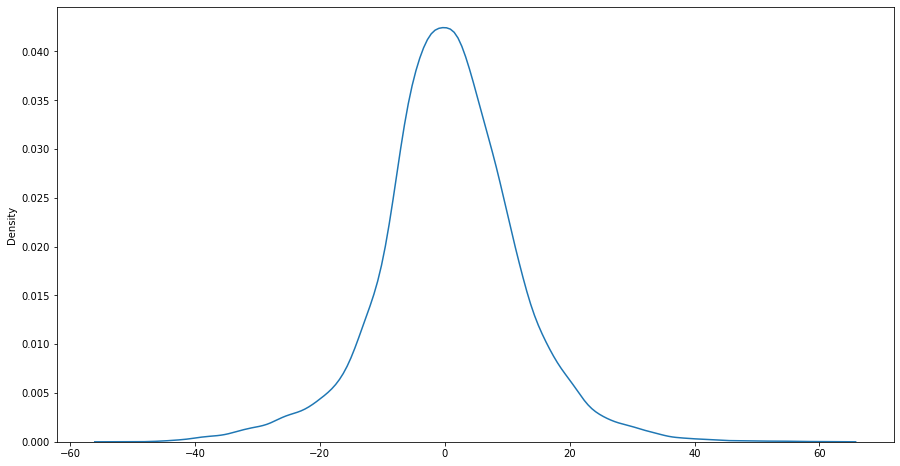

In [40]:
sns.distplot(mlr_model.resid,hist=False)

In [41]:
from statsmodels.graphics.gofplots import qqplot

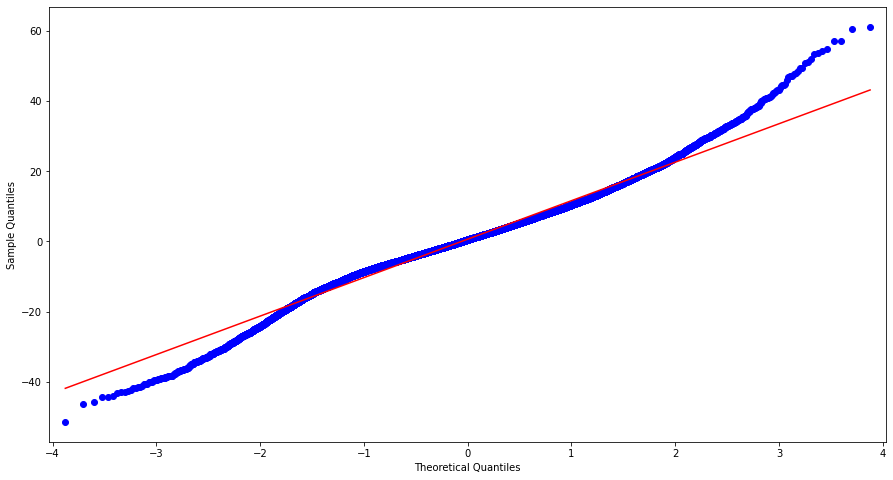

In [42]:
qqplot(mlr_model.resid,line='r')
plt.show()

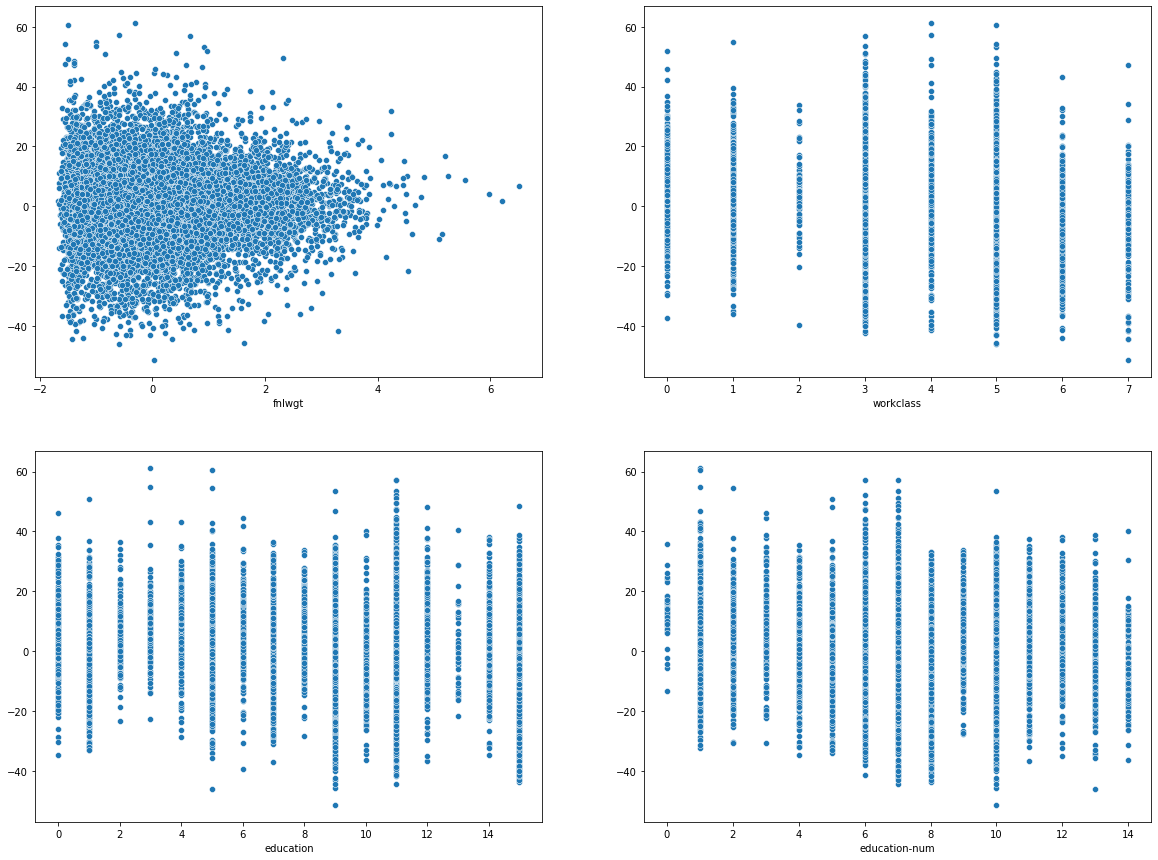

In [43]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,15))

for variable,subplots in zip(x_train.columns[1:5],ax.flatten()):
    sns.scatterplot(x_train[variable],mlr_model.resid,ax=subplots)

In [44]:
from statsmodels.compat import lzip

In [45]:
import statsmodels.stats.api as sts

In [46]:
names = ['Lagrange multiplier statistic', 'p-value','f-value']
lzip(names,sts.het_breuschpagan(mlr_model.resid,mlr_model.model.exog))

[('Lagrange multiplier statistic', 4387.333744253047),
 ('p-value', 0.0),
 ('f-value', 407.5316339585323)]

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
for i in range(len(num_data_train.columns)):
    vif=pd.DataFrame()
    vif['VIF_Factor']=[variance_inflation_factor(num_data_train.values,i) for i in range(num_data_train.shape[1])]
    vif['Features']=num_data_train.columns
    multi=vif[vif['VIF_Factor']>10]
    
    if(multi.empty==False):
        sorted_multi=multi.sort_values(by='VIF_Factor',ascending=False)
    else:
        vif
        break
        
    if(sorted_multi.empty==False):
        numerical_data=num_data_train.drop(sorted_multi.Features.iloc[0],axis=1)
    else:
        vif

In [49]:
vif

,VIF_Factor,Features
0,2.84421,age
1,2.84421,fnlwgt


In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lin_regression=LinearRegression()

In [52]:
lin_regression.fit(x_train,y_train)

LinearRegression()

In [53]:
y_train_prediction=lin_regression.predict(x_train)
y_test_prediction=lin_regression.predict(x_test)

In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [55]:
mse_train=mean_squared_error(y_train,y_train_prediction)
mse_test=mean_squared_error(y_test,y_test_prediction)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)

In [56]:
rmse_train,rmse_test

(10.011753962938085, 4.7858426448023765)

In [57]:
mae_train=mean_absolute_error(y_train,y_train_prediction)
mae_test=mean_absolute_error(y_test,y_test_prediction)

In [58]:
mae_train,mae_test

(7.1634815124952675, 4.016316554733017)

In [59]:
mape_train=mean_absolute_percentage_error(y_train,y_train_prediction)
mape_test=mean_absolute_percentage_error(y_test,y_test_prediction)

In [60]:
mape_train,mape_test

(0.25779186905042195, 0.10010934029744252)

In [61]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [63]:
linreg_forward=SequentialFeatureSelector(estimator=lin_regression,k_features=(5,10),
                                        forward=True,cv=12,
                                        scoring='r2')

In [65]:
sfs_forward=linreg_forward.fit(x_train,y_train)

In [66]:
print('Feature Selection using forward selection are : ',sfs_forward.k_feature_names_)
print('R-Squared : ', sfs_forward.k_score_)

Feature Selection using forward selection are :  ('age', 'workclass', 'education', 'education-num', 'marital-status', 'relationship', 'race', 'sex', 'capital-gain', 'income')
R-Squared :  0.18784698561077853


In [67]:
linreg_backward=SequentialFeatureSelector(estimator=lin_regression,k_features=(5,10),
                                         forward=False,cv=12,
                                         scoring='r2')

In [68]:
sfs_backward=linreg_backward.fit(x_train,y_train)

In [69]:
print('Feature Selection using backward selection are : ',sfs_backward.k_feature_names_)
print('R-Squared : ', sfs_backward.k_score_)

Feature Selection using backward selection are :  ('age', 'workclass', 'education', 'education-num', 'marital-status', 'relationship', 'race', 'sex', 'capital-gain', 'income')
R-Squared :  0.18784698561077853


In [70]:
from sklearn.feature_selection import RFE

In [71]:
rfe=RFE(estimator=lin_regression,n_features_to_select=12)

In [72]:
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=12)

In [74]:
feat_index = pd.Series(data = rfe.ranking_, index = x_train.columns)

In [75]:
signi_feat_rfe = feat_index[feat_index==1].index

In [76]:
signi_feat_rfe

Index(['age', 'fnlwgt', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-loss', 'income'],
      dtype='object')

In [77]:
from sklearn.model_selection import KFold,LeaveOneOut,cross_val_score

In [78]:
kf=KFold(n_splits=5)

In [79]:
def get_score(model,x_train_k,x_test_k,y_train_k,y_test_k):
    model.fit(x_train_k,y_train_k)
    x=model.score(x_train_k,y_train_k)
    return x

In [81]:
scores=[]
for i,j in kf.split(x_train):
    x_train_k,x_test_k,y_train_k,y_test_k=x_train.iloc[i],x_train.iloc[j],y_train.iloc[i],y_train.iloc[j]
    s=get_score(lin_regression,x_train_k,x_test_k,y_train_k,y_test_k)
    scores.append(s)

In [82]:
print('All Scores',scores,sep='\n')
print('Maximum Scores obtained : ',max(scores),sep='\n')
print('Minimum Scores obtained : ',min(scores),sep='\n')
print('Average Scores obtained : ',np.mean(scores),sep='\n')

All Scores
[0.1863140736778749, 0.18916219783640065, 0.19380695888921284, 0.18963078592418003, 0.19195995400802135]
Maximum Scores obtained : 
0.19380695888921284
Minimum Scores obtained : 
0.1863140736778749
Average Scores obtained : 
0.19017479406713794


In [83]:
loocv=LeaveOneOut()

In [87]:
loocv_rmse=[]
for i,j in loocv.split(x_train):
    x_train_l,x_test_l,y_train_l,y_test_l=x_train.iloc[i],x_train.iloc[j],y_train.iloc[i],y_train.iloc[j]
    lin_regression.fit(x_train_l,y_train_l)
    y_l=lin_regression.predict(x_test_l)
    rmse=np.sqrt(mean_squared_error(y_test_l,y_l))
    loocv_rmse.append(rmse)

In [88]:
print('All Scores',loocv_rmse,sep='\n')
print('Maximum Scores obtained : ',max(loocv_rmse),sep='\n')
print('Minimum Scores obtained : ',min(loocv_rmse),sep='\n')
print('Average Scores obtained : ',np.mean(loocv_rmse),sep='\n')

All Scores
[4.234111958177053, 8.03605005219012, 11.050239549564047, 8.373007426481806, 12.814877816162081, 3.751729247409159, 0.3377346472814651, 2.24099065966206, 6.716553445189987, 10.886787253702806, 14.173266285320864, 2.0470593507957204, 5.199845691955879, 2.4773268177114076, 2.611293641252871, 17.70878188030791, 29.812616369667836, 11.564409456222073, 4.1769453428868175, 5.619041179853184, 2.941138562444401, 16.64443498116985, 2.2392261682640466, 7.080713713266377, 0.2296510929638984, 9.105252494678936, 1.283370679808442, 10.166469713224146, 2.1197775887183496, 15.922504917292017, 12.267725908707433, 6.207365290114787, 6.6890073781960595, 7.910453630378505, 34.409971233698485, 3.6707963249193085, 5.359000345932635, 10.729293707533913, 2.10850174283258, 7.291064304119963, 0.24218273293539028, 7.482586873364308, 2.722477501703459, 6.28997011898209, 0.6720712145160448, 13.199661264724071, 16.72829741638772, 0.280857202214996, 4.324613150471933, 1.5386855597817402, 1.096962316698430